In [83]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision as tv
import torchvision.transforms as transforms


import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

from PIL import Image


In [6]:
data_set_mnist = tv.datasets.MNIST(root='./data', train=True, download=True, transform=tv.transforms.ToTensor())

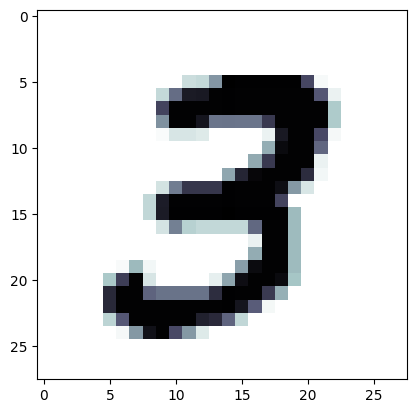

In [69]:
plt.imshow(data_set_mnist[7][0].numpy()[0], cmap = 'bone_r')
plt.show()

In [38]:
batch_size = 50
train_loader = torch.utils.data.DataLoader(data_set_mnist, batch_size=batch_size, shuffle=True, num_workers=2, drop_last = True)
test_loader = torch.utils.data.DataLoader(data_set_mnist, batch_size=10, shuffle=True, num_workers=2)

In [74]:
class Neural_Network_numbers(nn.Module):
  def __init__(self):
    super().__init__()

    linear1 = nn.Linear(28 * 28, 100)
    linear2 = nn.Linear(100, 10)

    act_function = nn.Sigmoid()

    self.model = nn.Sequential(
        nn.Flatten(),
        linear1,
        act_function,
        linear2
    )

  def forward(self, x):
    return self.model(x)



In [75]:
loss_fn = nn.CrossEntropyLoss()
model = Neural_Network_numbers()

In [76]:
optimizer = optim.SGD(model.parameters(), lr = 0.001)

In [79]:
def accuracy(pred, label):
  return (pred.argmax(dim=1) == label).float().mean()

In [82]:
epochs = 10
for _ in range(epochs):
  loss_value = 0
  acc_value = 0
  for img, label in (pbar := tqdm(train_loader, position=0)):
    optimizer.zero_grad()
    pred = model(img)

    loss = loss_fn(pred, label)
    loss.backward()

    optimizer.step()

    acc_curr = accuracy(pred, label)
    acc_value += acc_curr.item()
    loss_value += loss.item()
  print('accuracy', acc_value / len(train_loader))
  print('loss', loss_value)


100%|██████████| 1200/1200 [00:13<00:00, 89.53it/s] 


accuracy 0.7055500032256047
loss 1829.5864466428757


100%|██████████| 1200/1200 [00:13<00:00, 89.13it/s] 


accuracy 0.722633334894975
loss 1736.3414227962494


100%|██████████| 1200/1200 [00:13<00:00, 89.49it/s] 


accuracy 0.7341666673620542
loss 1648.639704823494


100%|██████████| 1200/1200 [00:13<00:00, 88.71it/s] 


accuracy 0.7466833338638147
loss 1567.2165565490723


100%|██████████| 1200/1200 [00:13<00:00, 87.94it/s] 


accuracy 0.7565499991675217
loss 1492.2349331378937


100%|██████████| 1200/1200 [00:13<00:00, 89.52it/s] 


accuracy 0.7664166646699111
loss 1423.5347326993942


100%|██████████| 1200/1200 [00:13<00:00, 90.33it/s] 


accuracy 0.7758999978005886
loss 1360.7691558599472


100%|██████████| 1200/1200 [00:13<00:00, 90.13it/s] 


accuracy 0.7824999961753686
loss 1303.4814395308495


100%|██████████| 1200/1200 [00:13<00:00, 90.60it/s]


accuracy 0.7909166629612446
loss 1251.1087391972542


100%|██████████| 1200/1200 [00:12<00:00, 96.60it/s]

accuracy 0.7968666631480058
loss 1203.2144969701767
